
# Unit 5.2c: Simple harmonic oscillation -- Runge-Kutta (RK2)


One 2nd-ODE $\to $ Two 1st-ODEs
$$
\frac{d^{2}x}{dt^{2}}=-\omega^{2}x\Rightarrow\begin{cases}
\frac{dx}{dt}=v\\
\frac{dv}{dt}=-\omega^{2}x
\end{cases}
$$
- Thus, in Euler method $K_1$ for $v$ and $x$ are given:
\begin{align*}
K_{1}^{x} & = hv_{n} \\
K_{1}^{v} & =h\left(-\omega^{2}x_{n}\right)
\end{align*}

- $x$ and $v$ at middle point:

$$x_{n+1/2}	=	x_n+\frac{K_{1}^{x}}{2}=x_n+\frac{h}{2}v_n$$

$$v_{n+1/2}	=	v_n+\frac{K_{1}^{v}}{2}=v_n+\frac{h}{2}\left(-\omega^2x_{n}\right)$$

- $f^x$ and $f^v$ at middle point:

$$f_{n+1/2}^{x}=v_{n+1/2}$$

$$f_{n+1/2}^{v}=-\omega^{2}x_{n+1/2}$$

- $x$ and $v$ at new time step $t_{n+1}$

$$x_{n+1}^{RK2}  = x_{n}+ h f^x_{n+1/2} = x_{n}+v_{n}h-\omega^{2}x_{n}\frac{h^{2}}{2}$$

$$v_{n+1}^{RK2}  = v_{n}+ h f^v_{n+1/2} = v_{n}-\omega^{2}x_{n}h-\omega^{2}v_{n}\frac{h^{2}}{2}$$


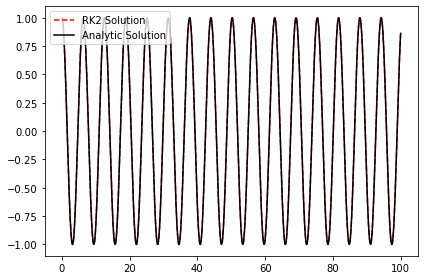

In [11]:
import numpy as np
import matplotlib.pyplot as plt

Nt = 10000 # total number of time interval
total_time = 100. # seconds
t_arr = np.linspace(0,total_time,Nt+1)
x_arr = np.zeros(Nt+1)
v_arr = np.zeros(Nt+1)
h = total_time / Nt
omega = 1.0 # angular velocity 

x_arr[0] = 1. # meters
v_arr[0] = 0. # m/s


def ComputeK(x,v,h):
    fx = v
    fv = -omega**2.0 * x
    K_x = h * fx
    K_v = h * fv
    return [K_x, K_v]
    

for n in range(Nt):
    x_n = x_arr[n]
    v_n = v_arr[n]
    #=== Euler
    [K1_x, K1_v] = ComputeK(x_n,v_n,h)
    x_mid = x_n + 0.5 * K1_x
    v_mid = v_n + 0.5 * K1_v
    #==== RK2
    [K2_x, K2_v] = ComputeK(x_mid,v_mid,h)
    x_arr[n+1] = x_n + K2_x
    v_arr[n+1] = v_n + K2_v
    
    
plt.plot(t_arr, x_arr, '--r',label = 'RK2 Solution') 
plt.plot(t_arr, np.cos(omega * t_arr), '-k', label = 'Analytic Solution')
plt.legend(loc="upper left")
plt.tight_layout()
#plt.savefig("Unit5.2c_SHO_RK2.png")



## Inclass exercise: One-dim Mass-Spring-Damper Model 
---    
<font color='black'>
    
Consider a mass-spring-damper model:
$$m\ddot{x} = -kx -b \dot{x}$$
The mass of the object $m = 1\;\rm kg$, the damping coefficient $b = 2 \rm \; kg/s$, and the spring constant $k = 1 \rm \;kg/s^2$. The initial conditions are $x(0) = 10 \;\rm m$ and $v(0) = 0\;\rm m/s$. Please find $x(t)$ both **analytically** and **numerically** (Second order Runge-Kutta method, RK2) for the first 10 seconds. 
    


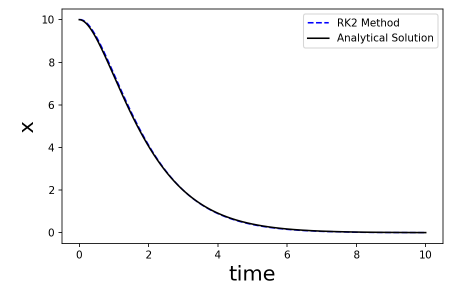